In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
retail = pd.read_csv('online_retail.csv', encoding = "ISO-8859-1")

- **InvoiceNo**: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
- **StockCode**: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
- **Description**: Product (item) name. Nominal.
- **Quantity**: The quantities of each product (item) per transaction. Numeric.
- **InvoiceDate**: Invice date and time. Numeric. The day and time when a transaction was generated.
- **UnitPrice**: Unit price. Numeric. Product price per unit in sterling (Â£).
- **CustomerID**: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
- **Country**: Country name. Nominal. The name of the country where a customer resides.

In [3]:
retail.head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
Unnamed: 0     50000 non-null int64
InvoiceNo      50000 non-null object
StockCode      50000 non-null object
Description    49858 non-null object
Quantity       50000 non-null int64
InvoiceDate    50000 non-null object
UnitPrice      50000 non-null float64
CustomerID     32119 non-null float64
Country        50000 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 3.4+ MB


In [5]:
retail.describe()

,Unnamed: 0,Quantity,UnitPrice,CustomerID
count,50000.000000,50000.000000,50000.000000,32119.000000
mean,24999.500000,8.293320,6.418361,15431.221987
std,14433.901067,55.528494,166.504827,1753.358819
min,0.000000,-9360.000000,0.000000,12347.000000
25%,12499.750000,1.000000,1.250000,14057.000000
50%,24999.500000,2.000000,2.510000,15464.000000
75%,37499.250000,8.000000,4.250000,17059.000000
max,49999.000000,2880.000000,16888.020000,18283.000000


## Handling NaN Values

In [6]:
retail.isna().sum()

Unnamed: 0         0
InvoiceNo          0
StockCode          0
Description      142
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     17881
Country            0
dtype: int64

In [7]:
desc_nan = retail['Description'].isna().sum()
custid_nan = retail['CustomerID'].isna().sum()

print('Terdapat {}% NaN values pada kolom \033[1mDescription\033[0m'.format(round(desc_nan / len(retail) * 100, 2)))
print('Terdapat {}% NaN values pada kolom \033[1mCustomerID'.format(round(custid_nan / len(retail) * 100, 2)))

Terdapat 0.28% NaN values pada kolom Description
Terdapat 35.76% NaN values pada kolom CustomerID


In [8]:
592/541909

0.0010924343386066663

In [9]:
retail[retail['Description'].isna()].head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom


In [10]:
retail[retail['Description'].isna()].describe()

,Unnamed: 0,Quantity,UnitPrice,CustomerID
count,142.000000,142.000000,142.0,0.0
mean,19666.591549,-18.154930,0.0,NaN
std,12659.283550,107.827041,0.0,NaN
min,622.000000,-939.000000,0.0,NaN
25%,7210.250000,-27.250000,0.0,NaN
50%,20018.000000,-1.500000,0.0,NaN
75%,22294.750000,2.750000,0.0,NaN
max,46883.000000,460.000000,0.0,NaN


In [11]:
a = retail[(retail['Description'].isna()) & (retail['Quantity'] > 0)]
b = retail[(retail['Description'].isna()) & (retail['Quantity'] < 0)]

In [12]:
a.describe()

,Unnamed: 0,Quantity,UnitPrice,CustomerID
count,68.000000,68.000000,68.0,0.0
mean,20927.720588,28.808824,0.0,NaN
std,11944.095830,69.295443,0.0,NaN
min,622.000000,1.000000,0.0,NaN
25%,13960.750000,1.000000,0.0,NaN
50%,21777.500000,3.000000,0.0,NaN
75%,22672.250000,27.750000,0.0,NaN
max,45394.000000,460.000000,0.0,NaN


In [13]:
b.describe()

,Unnamed: 0,Quantity,UnitPrice,CustomerID
count,74.000000,74.000000,74.0,0.0
mean,18507.716216,-61.310811,0.0,NaN
std,13257.437613,118.774326,0.0,NaN
min,2406.000000,-939.000000,0.0,NaN
25%,7206.250000,-70.000000,0.0,NaN
50%,14063.500000,-24.500000,0.0,NaN
75%,22293.750000,-14.250000,0.0,NaN
max,46883.000000,-1.000000,0.0,NaN


In [14]:
def check_char(x):
    for i in range(len(x)):
        if x[0] == 'C':
            return 'Cancelled'
        else:
            return 'Succeed'
        
x = a['InvoiceNo'].apply(check_char)
print('Succeed sebanyak {}'.format(np.sum(x == 'Succeed')))
print('Cancelled sebanyak {}'.format(np.sum(x == 'Cancelled')))

Succeed sebanyak 68
Cancelled sebanyak 0


In [15]:
y = b['InvoiceNo'].apply(check_char)
print('Succeed sebanyak {}'.format(np.sum(y == 'Succeed')))
print('Cancelled sebanyak {}'.format(np.sum(y == 'Cancelled')))

Succeed sebanyak 74
Cancelled sebanyak 0


Berdasarkan data diatas saya dapat menyimpulkan bahwa NaN values pada kolom **Description** bisa jadi hanya testing dari developer karena seluruh data berisi 0 pada UnitPrice serta kolom InoviceNo tidak menunjukkan bahwa data tersebut merupakan Cancellation baik untuk Quantity > 0 maupun Quantity < 1. Selain itu, seorang penjual tidak mungkin tidak memberikan sedikit description ataupun sedikit judul dari produk yang mereka jual dan seorang pembeli pun tidak mungkin akan membeli produk yang tidak diketahui nama atau deskripsi dari produk tersebut.

In [16]:
retail[retail['CustomerID'].isna()].head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [17]:
retail[retail['CustomerID'].isna()].describe()

,Unnamed: 0,Quantity,UnitPrice,CustomerID
count,17881.000000,17881.000000,17881.000000,0.0
mean,26189.096807,2.837146,12.157179,NaN
std,13871.236060,14.670241,278.110102,NaN
min,622.000000,-939.000000,0.000000,NaN
25%,15238.000000,1.000000,1.660000,NaN
50%,24996.000000,1.000000,3.360000,NaN
75%,38842.000000,3.000000,5.910000,NaN
max,49033.000000,752.000000,16888.020000,NaN


In [18]:
retail[(retail['CustomerID'].isna()) & (retail['Quantity'] < 1)]

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,2406,536589,21777,NaN,-10,12/1/2010 16:50,0.00,NaN,United Kingdom
4347,4347,536764,84952C,NaN,-38,12/2/2010 14:42,0.00,NaN,United Kingdom
7188,7188,536996,22712,NaN,-20,12/3/2010 15:30,0.00,NaN,United Kingdom
7189,7189,536997,22028,NaN,-20,12/3/2010 15:30,0.00,NaN,United Kingdom
7190,7190,536998,85067,NaN,-6,12/3/2010 15:30,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...,...
45150,45150,540252,22198,NaN,-100,1/5/2011 16:25,0.00,NaN,United Kingdom
45509,45509,C540266,M,Manual,-1,1/6/2011 11:05,458.29,NaN,United Kingdom
45510,45510,C540266,POST,POSTAGE,-1,1/6/2011 11:05,35.09,NaN,United Kingdom
45623,45623,540272,90096,NaN,-54,1/6/2011 11:57,0.00,NaN,United Kingdom


In [19]:
less_than1 = retail[(retail['CustomerID'].isna()) & (retail['Quantity'] < 1)]
print("Persentase dari CustomerID yang Quantity kurang dari 1 adalah {}%".format(round(len(less_than1)/135080, 2)))

Persentase dari CustomerID yang Quantity kurang dari 1 adalah 0.0%


In [20]:
x = pd.DataFrame()
x['Desc'] = retail[(retail['CustomerID'].isna()) & (retail['Quantity'] < 1)]['Description'].value_counts()
x['Desc'].head(40)

AMAZON FEE                             8
Manual                                 6
?                                      3
Dotcom sales                           2
SAMPLES                                2
check                                  2
Bank Charges                           2
reverse 21/5/10 adjustment             2
OCEAN SCENT CANDLE IN JEWELLED BOX     1
TRADITIONAL WOODEN SKIPPING ROPE       1
ROUND SNACK BOXES SET OF 4 FRUITS      1
ALPHABET STENCIL CRAFT                 1
POPPY'S PLAYHOUSE KITCHEN              1
FAIRY TALE COTTAGE NIGHTLIGHT          1
10 COLOUR SPACEBOY PEN                 1
EIGHT PIECE DINOSAUR SET               1
S/6 WOODEN SKITTLES IN COTTON BAG      1
ENAMEL MEASURING JUG CREAM             1
PAPER CHAIN KIT LONDON                 1
POSTAGE                                1
ROUND SNACK BOXES SET OF 4 SKULLS      1
MEASURING TAPE BABUSHKA RED            1
ROTATING SILVER ANGELS T-LIGHT HLDR    1
4 TRADITIONAL SPINNING TOPS            1
faulty          

Yang dapat saya simpulkan adalah bahwa CustomerID yang merupakan NaN values merupakan customer yang tidak mendaftarkan diri kedalam pihak platform karena di tahun 2010-2011 online retail belum sampai ketahap customer wajib mendaftarkan diri jika ingin membeli produk. Untuk CustomerID NaN dan Quantity < 1 menurut saya adalah daftar customer yang melakukan refund dengan complaint, penghapusan produk tidak sesuai standard, telah laku di platform lain, hilang, dan ketidak cocokan stock yang telah diinput.

In [21]:
after_hand_nan = retail.dropna()

#### Kesimpulan NaN values
Kesimpulan dari saya adalah NaN values dari Description dan CustomerID akan lebih baik untuk di drop. Analisa saya dari Description merupakan testing dari developer dan CustomerID sebanyak 24.9% tidak bisa dilakukan **impute** karena fitur tersebut mendeskripsikan id dari setiap user serta ketakutan akan penurunan akurasi dari rekomendasi yang akan dibuat.

In [22]:
retail[retail['StockCode'].str.contains('^[a-zA-Z]+', regex = True)]['StockCode'].value_counts()

POST            85
DOT             62
M               46
C2              11
D                9
AMAZONFEE        9
BANK CHARGES     3
S                2
DCGS0003         2
DCGS0076         2
gift_0001_40     1
m                1
gift_0001_50     1
DCGS0070         1
gift_0001_20     1
gift_0001_30     1
Name: StockCode, dtype: int64

In [23]:
retail[retail['StockCode'] == 'D'].sort_values(by = 'Quantity')

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
9038,9038,C537164,D,Discount,-1,12/5/2010 13:21,29.29,14527.0,United Kingdom
14498,14498,C537597,D,Discount,-1,12/7/2010 12:34,281.00,15498.0,United Kingdom
19392,19392,C537857,D,Discount,-1,12/8/2010 16:00,267.12,17340.0,United Kingdom
31134,31134,C538897,D,Discount,-1,12/15/2010 9:14,5.76,16422.0,United Kingdom
31135,31135,C538897,D,Discount,-1,12/15/2010 9:14,42.50,16422.0,United Kingdom
31663,31663,C539003,D,Discount,-1,12/15/2010 12:35,26.93,14527.0,United Kingdom
38609,38609,C539589,D,Discount,-1,12/20/2010 13:14,13.88,14527.0,United Kingdom
44405,44405,C540171,D,Discount,-1,1/5/2011 12:26,22.97,14527.0,United Kingdom


In [24]:
retail[retail['StockCode'] == 'M'].sort_values(by = 'Quantity')

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
21758,21758,C538124,M,Manual,-4,12/9/2010 15:43,0.50,15329.0,United Kingdom
45913,45913,C540307,M,Manual,-2,1/6/2011 12:58,21.95,15823.0,United Kingdom
45509,45509,C540266,M,Manual,-1,1/6/2011 11:05,458.29,NaN,United Kingdom
14716,14716,C537610,M,Manual,-1,12/7/2010 13:23,631.31,NaN,United Kingdom
23241,23241,C538189,M,Manual,-1,12/10/2010 10:35,133.08,NaN,United Kingdom
28993,28993,C538681,M,Manual,-1,12/13/2010 17:12,316.30,NaN,United Kingdom
28994,28994,C538682,M,Manual,-1,12/13/2010 17:14,1130.90,NaN,United Kingdom
45622,45622,C540271,M,Manual,-1,1/6/2011 11:51,1126.00,12503.0,Spain
14728,14728,C537613,M,Manual,-1,12/7/2010 13:28,313.78,NaN,United Kingdom
29530,29530,C538806,M,Manual,-1,12/14/2010 11:59,4.25,15181.0,United Kingdom


Saya menemukan produk-produk yang diawali dengan Huruf pada StockCodenya. Sedikit dari produk tersebut yang mungkin saya ketahui jika melihat Description, seperti Bank Charges, Discount, Amazon Fee. Namun, lebih dari 70% saya tidak mengetahui jenis produk tersebut serta tidak ada petunjuk pada sumber data. Oleh karena itu, saya akan menghapus produk-produk tersebut agar produk-produk yang tidak diketahui tersebut tidak muncul pada hasil rekomendasi kelak. 

In [25]:
retail = retail[~(retail['StockCode'].str.contains('^[a-zA-Z]+', regex = True))]

## Handling Outliers

In [26]:
after_hand_nan.describe()

,Unnamed: 0,Quantity,UnitPrice,CustomerID
count,32119.000000,32119.000000,32119.000000,32119.000000
mean,24337.238395,11.330832,3.223498,15431.221987
std,14696.382741,68.223358,8.491211,1753.358819
min,0.000000,-9360.000000,0.000000,12347.000000
25%,11486.500000,2.000000,1.250000,14057.000000
50%,25080.000000,4.000000,2.100000,15464.000000
75%,34647.500000,12.000000,3.750000,17059.000000
max,49999.000000,2880.000000,1126.000000,18283.000000


In [27]:
after_hand_nan.describe(exclude = 'number')

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,32119,32119,32119,32119,32119
unique,1979,2501,2512,1808,23
top,540372,85123A,WHITE HANGING HEART T-LIGHT HOLDER,1/6/2011 16:41,United Kingdom
freq,171,260,260,171,29184


Berdasarkan describe diatas kolom Unit Price memiliki nilai minus.

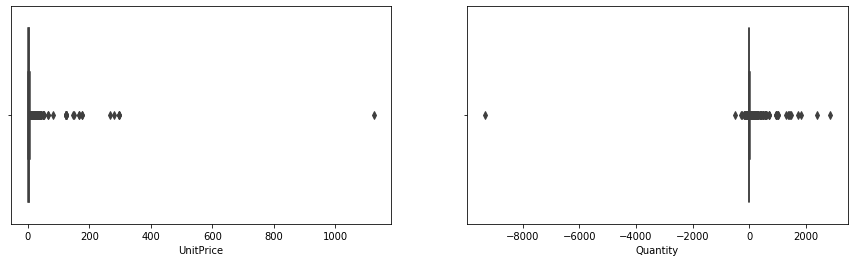

In [28]:
plt.figure(figsize = (15, 4))
plt.subplot(1, 2, 1)
sns.boxplot(after_hand_nan['UnitPrice'])

plt.subplot(1, 2, 2)
sns.boxplot(after_hand_nan['Quantity'])

In [29]:
def check_out(data):
    q1 = np.quantile(data, .25)
    median = data.median()
    q3 = np.quantile(data, .75)
    
    iqr = q3 - q1
    batas = q3 + (1.5 * iqr)
    bbawah = q1 - (1.5 * iqr)
    
    return print('Batas atas = {}\nBatas bawah = {}'.format(batas, bbawah))

### Quantity

In [30]:
check_out(after_hand_nan['Quantity'])

Batas atas = 27.0
Batas bawah = -13.0


Mengecek Quantity yang kurang dari 0.

In [31]:
after_hand_nan[after_hand_nan['Quantity'] < 0].head(10)

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
238,238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
239,239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,12/1/2010 10:24,3.45,17548.0,United Kingdom
240,240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
241,241,C536391,22553,PLASTERS IN TIN SKULLS,-24,12/1/2010 10:24,1.65,17548.0,United Kingdom
939,939,C536506,22960,JAM MAKING SET WITH JARS,-6,12/1/2010 12:38,4.25,17897.0,United Kingdom


In [32]:
def check_char(x):
    for i in range(len(x)):
        if x[0] == 'C':
            return 'Canceled'
        else:
            return 'Not canceled'

In [33]:
minus = after_hand_nan[after_hand_nan['Quantity'] < 0]

In [34]:
minus['Cancellation'] = minus['InvoiceNo'].apply(check_char)

C:\Users\copi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
minus['Cancellation'].value_counts()

Canceled    880
Name: Cancellation, dtype: int64

Ternyata data dari Quantity < 0 merupakan data yang berstatus cancel karena ditandai dengan adanya awalan 'C' pada InvoiceNo.

In [36]:
after_hand_nan[after_hand_nan['Quantity'] > 27].head()

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9,9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom
31,31,536370,10002,INFLATABLE POLITICAL GLOBE,48,12/1/2010 8:45,0.85,12583.0,France
44,44,536370,22492,MINI PAINT SET VINTAGE,36,12/1/2010 8:45,0.65,12583.0,France
46,46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,12/1/2010 9:00,2.55,13748.0,United Kingdom
65,65,536374,21258,VICTORIAN SEWING BOX LARGE,32,12/1/2010 9:09,10.95,15100.0,United Kingdom


Quantity < 0 merupakan data yang berstatus cancel dan untuk Quantity > batas atas merupakan hal normal karena membeli produk secara masal.

### Unit Price

In [37]:
check_out(after_hand_nan['UnitPrice'])

Batas atas = 7.5
Batas bawah = -2.5


Berdasarkan boxplot sudah tidak ada UnitPrice < 0 karena berasal dari baris NaN values CustomerID 

In [38]:
after_hand_nan[after_hand_nan['UnitPrice'] > 7.5].head(10)

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
5,5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
16,16,536367,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,12/1/2010 8:34,9.95,13047.0,United Kingdom
19,19,536367,21777,RECIPE BOX WITH METAL HEART,4,12/1/2010 8:34,7.95,13047.0,United Kingdom
20,20,536367,48187,DOORMAT NEW ENGLAND,4,12/1/2010 8:34,7.95,13047.0,United Kingdom
45,45,536370,POST,POSTAGE,3,12/1/2010 8:45,18.00,12583.0,France
63,63,536373,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 9:02,7.65,17850.0,United Kingdom
65,65,536374,21258,VICTORIAN SEWING BOX LARGE,32,12/1/2010 9:09,10.95,15100.0,United Kingdom
80,80,536375,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 9:32,7.65,17850.0,United Kingdom
141,141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
151,151,536382,22839,3 TIER CAKE TIN GREEN AND CREAM,2,12/1/2010 9:45,14.95,16098.0,United Kingdom


Menurut saya akan lebih baik jika Outliers ditandai terlebih dahulu. Untuk Quantity, mungkin nilai minus atau Cancellation akan lebih menghasilkan rekomendasi yang lebih baik karena tetap mengikuti History dari setiap user. Untuk UnitPrice, menurut saya masih dalam hal wajar jika sebuah produk memiliki harga tinggi karena harga itu relatif. 

In [39]:
def mark_out(data):
    if (data['Quantity'] < -13) or (data['Quantity'] > 27) or (data['UnitPrice'] > 7.5):
        return 1
    else:
        return 0

1 = Outliers, 0 = Not outliers.

In [40]:
after_hand_nan['Outliers'] = after_hand_nan.apply(lambda x: mark_out(x), axis = 1)

In [41]:
after_hand_nan.head(10)

,Unnamed: 0,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Outliers
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,0
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,0
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0
5,5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom,1
6,6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,0
7,7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,0
8,8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,0
9,9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom,1


In [42]:
sample_github = after_hand_nan.iloc[:50000]
sample_github.to_csv("clean.csv")

In [43]:
sample_github = retail.iloc[:50000]
sample_github.to_csv("online_retail.csv")

In [44]:
after_hand_nan.to_csv("clean.csv")